In [2]:
#Load data using pandas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from utils_early_disease import view_cut_patient
import datetime as dt

In [ ]:
path = "/home/pajaro/compu_Pipe_V3/data_transformation/data_t_20250520_053753.csv"
df_3 = pd.read_csv(path)
df_3 = df_3.rename(columns={"fecha_poli": "fecha_diagnostico"})

In [4]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCliente                613 non-null    int64  
 1   IAH                      613 non-null    float64
 2   Sexo                     613 non-null    object 
 3   Cantidad_Atenciones      613 non-null    float64
 4   fecha_poli               613 non-null    object 
 5   label_apnea              613 non-null    float64
 6   edad_poli                613 non-null    int64  
 7   last_appointment         613 non-null    object 
 8   prediction_window_start  613 non-null    object 
 9   end_observation_window   613 non-null    object 
 10  num_app_included         613 non-null    int64  
 11  total_app                613 non-null    int64  
 12  lista_consultas          613 non-null    object 
 13  lista_recorte            613 non-null    object 
dtypes: float64(3), int64(4), o

In [7]:
df_3["label_apnea"].value_counts()

label_apnea
1.0    491
0.0    122
Name: count, dtype: int64

In [6]:
df_3[["IAH", "Sexo", "fecha_diagnostico", "label_apnea", "edad_poli", "last_appointment", "prediction_window_start", "end_observation_window", "num_app_included", "total_app"]].head(15)

,IAH,Sexo,fecha_diagnostico,label_apnea,edad_poli,last_appointment,prediction_window_start,end_observation_window,num_app_included,total_app
0,9.0,F,2015-05-26,1.0,83,2017-12-05 08:45:15,2014-11-27,2014-06-12 21:41:54,8,97
1,12.0,M,2018-12-14,1.0,82,2020-01-28 15:51:27,2018-06-17,2018-01-30 11:57:51,3,159
2,108.0,F,2018-07-15,1.0,71,2019-11-29 14:52:45,2018-01-16,2017-11-30 08:26:49,2,125
3,6.0,F,2015-05-25,1.0,56,2016-04-11 11:41:49,2014-11-26,2014-06-05 10:14:06,6,26
4,6.0,F,2014-08-15,1.0,41,2016-10-11 15:51:50,2014-02-16,2014-02-12 15:06:34,1,60
5,24.0,F,2016-01-25,1.0,54,2020-02-18 10:53:33,2015-07-29,2015-02-10 13:52:53,21,258
6,7.0,F,2017-11-01,1.0,48,2020-02-04 16:02:00,2017-05-05,2016-11-16 21:09:38,13,107
7,49.0,F,2010-03-18,1.0,76,2020-02-17 14:45:17,2009-09-19,2009-05-20 16:36:26,10,202
8,48.0,M,2009-01-16,1.0,48,2018-11-21 09:31:18,2008-07-20,2008-02-25 09:33:39,6,218
9,3.9,F,2005-11-11,0.0,58,2020-02-10 13:43:37,2005-05-15,2005-03-02 03:26:05,1,49


In [9]:
def view_cut_patient_v2(data, id_patient):
    sample_data = data.loc[data["IdCliente"] == id_patient]    
    fecha_poli = sample_data["fecha_diagnostico"].iloc[0] 
    fecha_menos_seis_meses = sample_data["prediction_window_start"].iloc[0]
    lista_consultas = sample_data["lista_consultas"].iloc[0]
    lista_consultas = lista_consultas.split(",")    
    lista_recorte = sample_data["lista_recorte"].iloc[0]
    lista_recorte = lista_recorte.split(",")
       
    return fecha_poli, fecha_menos_seis_meses, lista_consultas, lista_recorte

In [10]:
id_patient = 10915
data = df_3
fecha_poli, fecha_menos_seis_meses, lista_consultas, lista_recorte = view_cut_patient_v2(data, id_patient)
print("id_patient: {}".format(id_patient))
print("diagnosis date {}".format(fecha_poli))
print("prediction window start: {}".format(fecha_menos_seis_meses))
#print(lista_consultas)
print("dates to include as the observation window:")
for i in lista_recorte:
    print(i)
print("all consulting dates of the patient")
for i in lista_consultas:
    print(i)

id_patient: 10915
diagnosis date 2014-08-15
prediction window start: 2014-02-16
dates to include as the observation window:
[Timestamp('2014-02-12 15:06:34')]
all consulting dates of the patient
[Timestamp('2006-09-06 18:57:17')
 Timestamp('2006-09-06 19:00:32')
 Timestamp('2006-09-21 12:35:27')
 Timestamp('2008-02-10 09:58:30')
 Timestamp('2008-03-05 12:23:04')
 Timestamp('2008-09-08 09:29:34')
 Timestamp('2008-09-12 07:41:00')
 Timestamp('2008-09-12 10:16:03')
 Timestamp('2010-03-10 10:18:22')
 Timestamp('2011-05-27 06:35:19')
 Timestamp('2011-05-26 23:35:22')
 Timestamp('2011-05-27 10:47:10')
 Timestamp('2011-05-27 20:30:28')
 Timestamp('2011-06-07 21:33:33')
 Timestamp('2011-06-08 01:58:40')
 Timestamp('2011-06-08 03:14:59')
 Timestamp('2011-06-08 07:16:57')
 Timestamp('2011-06-08 09:41:21')
 Timestamp('2011-06-08 17:54:14')
 Timestamp('2011-06-09 01:42:20')
 Timestamp('2011-06-09 14:57:24')
 Timestamp('2011-06-10 12:10:14')
 Timestamp('2011-08-17 10:31:18')
 Timestamp('2012-05-17 

In [11]:
df_3["num_app_included"].describe()

count    613.000000
mean       8.373573
std       18.467842
min        1.000000
25%        1.000000
50%        3.000000
75%        8.000000
max      238.000000
Name: num_app_included, dtype: float64

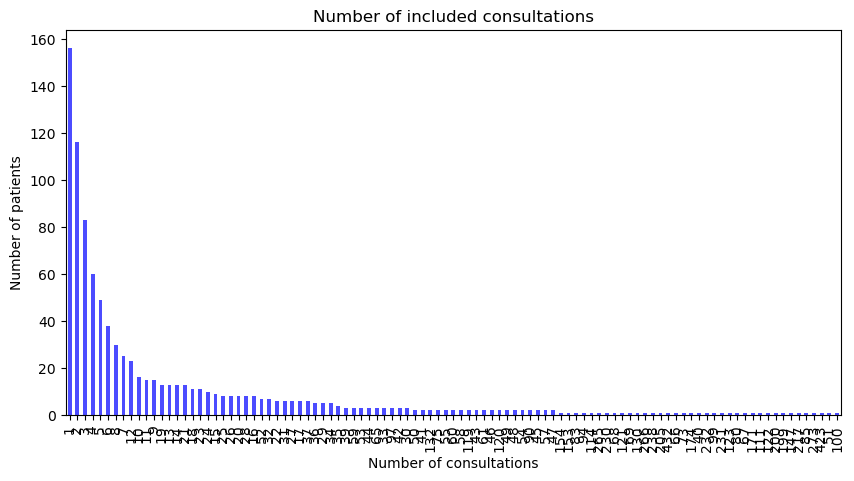

In [11]:
df_3["num_app_included"].value_counts().plot(kind="bar", figsize=(10, 5), color="blue", alpha=0.7)
plt.title("Number of included consultations")
plt.xlabel("Number of consultations")
plt.ylabel("Number of patients")
plt.xticks(rotation=90)
plt.show()

In [ ]:
def plot_comparative_graphs(df, column_to_split, column_to_plot, title1, title2):
    """
    Esta función separa un DataFrame según los valores únicos de una columna y genera dos gráficos comparativos,
    mostrando los valores sobre las barras.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        column_to_split (str): La columna según la cual se separará el DataFrame.
        column_to_plot (str): La columna que se graficará.
        title1 (str): Título del primer gráfico.
        title2 (str): Título del segundo gráfico.
    """
    # Obtener los valores únicos de la columna para dividir el DataFrame
    unique_values = df[column_to_split].unique()
    
    if len(unique_values) < 2:
        print("La columna para dividir debe tener al menos dos valores únicos.")
        return
    
    # Separar el DataFrame en dos subconjuntos
    df_1 = df[df[column_to_split] == unique_values[0]]
    df_2 = df[df[column_to_split] == unique_values[1]]
    
    # Crear los gráficos
    plt.figure(figsize=(14, 6))
    
    # Primer gráfico
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x=column_to_plot, data=df_1)
    plt.title(title1)
    plt.xlabel(column_to_plot)
    plt.ylabel("Count")
    # Agregar valores a las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Segundo gráfico
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x=column_to_plot, data=df_2)
    plt.title(title2)
    plt.xlabel(column_to_plot)
    plt.ylabel("Count")
    # Agregar valores a las barras
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

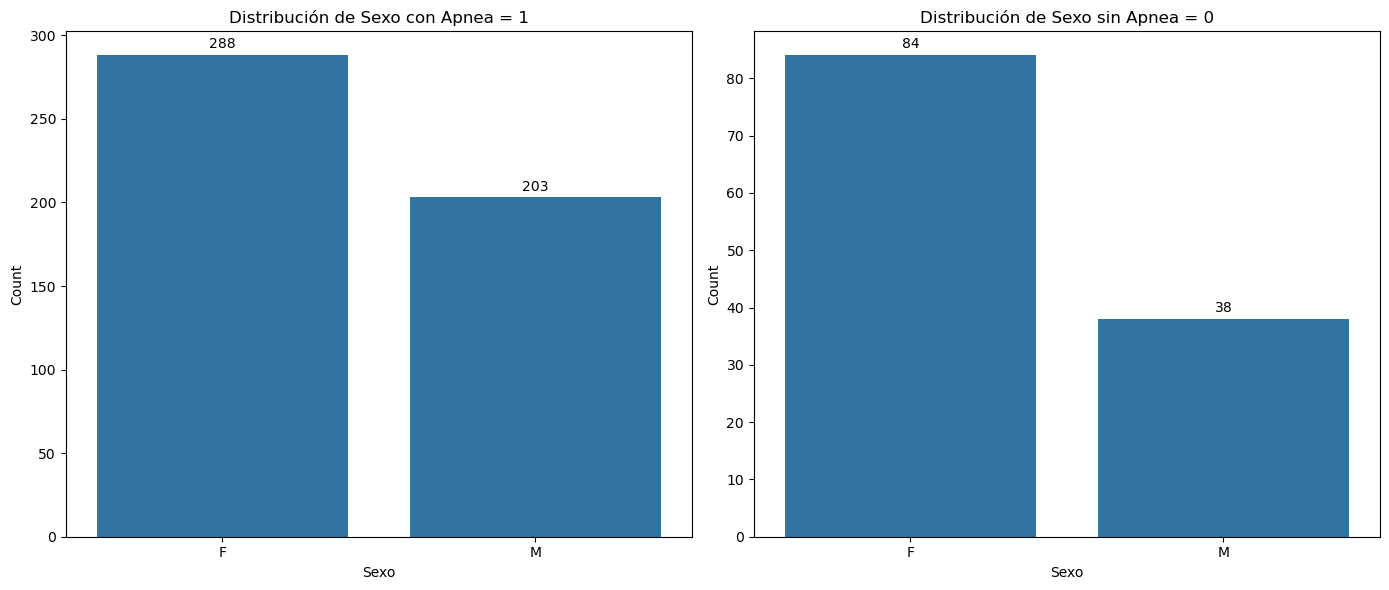

In [13]:
plot_comparative_graphs(
    df_3,
    column_to_split="label_apnea",
    column_to_plot="Sexo",
    title1="Distribución de Sexo con Apnea = 1",
    title2="Distribución de Sexo sin Apnea = 0"
)

In [ ]:
#TODO: Agregar el peso

In [14]:
def plot_comparative_graphs_with_bins(df, column_to_split, column_to_plot, bins, title1, title2):
    """
    Esta función separa un DataFrame según los valores únicos de una columna, agrupa los valores continuos
    en intervalos (bins) y genera dos gráficos comparativos.

    Args:
        df (pd.DataFrame): El DataFrame de entrada.
        column_to_split (str): La columna según la cual se separará el DataFrame.
        column_to_plot (str): La columna continua que se graficará.
        bins (int): Número de intervalos (bins) para agrupar los valores continuos.
        title1 (str): Título del primer gráfico.
        title2 (str): Título del segundo gráfico.
    """
    # Obtener los valores únicos de la columna para dividir el DataFrame
    unique_values = df[column_to_split].unique()
    
    if len(unique_values) < 2:
        print("La columna para dividir debe tener al menos dos valores únicos.")
        return
    
    # Separar el DataFrame en dos subconjuntos
    df_1 = df[df[column_to_split] == unique_values[0]]
    df_2 = df[df[column_to_split] == unique_values[1]]
    
    # Crear una nueva columna con los intervalos (bins) para la columna continua
    df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
    df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)
    
    # Crear los gráficos
    plt.figure(figsize=(14, 6))
    
    # Primer gráfico
    plt.subplot(1, 2, 1)
    ax1 = sns.countplot(x='binned', data=df_1, order=sorted(df_1['binned'].unique()))
    plt.title(title1)
    plt.xlabel(f"{column_to_plot} (agrupado)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # Agregar valores a las barras
    for p in ax1.patches:
        ax1.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Segundo gráfico
    plt.subplot(1, 2, 2)
    ax2 = sns.countplot(x='binned', data=df_2, order=sorted(df_2['binned'].unique()))
    plt.title(title2)
    plt.xlabel(f"{column_to_plot} (agrupado)")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    # Agregar valores a las barras
    for p in ax2.patches:
        ax2.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                     textcoords='offset points')
    
    # Mostrar los gráficos
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_2944/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_2944/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


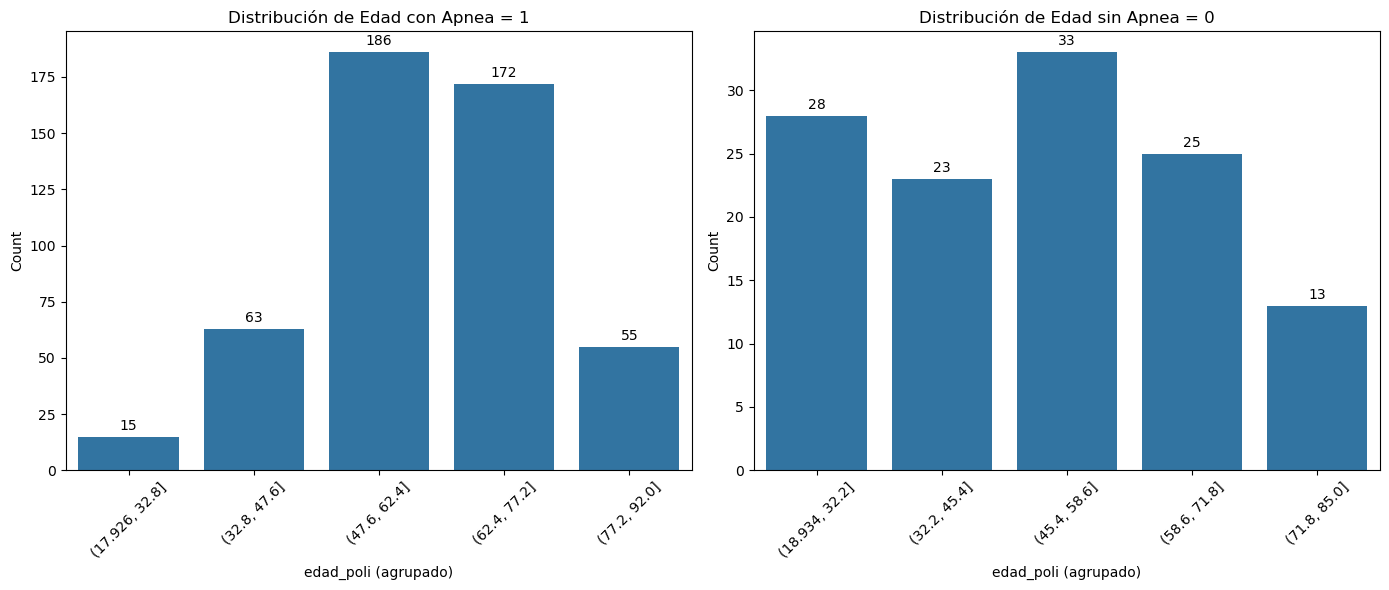

In [15]:
plot_comparative_graphs_with_bins(
    df_3,
    column_to_split="label_apnea",
    column_to_plot="edad_poli",
    bins=5,  # Número de intervalos
    title1="Distribución de Edad con Apnea = 1",
    title2="Distribución de Edad sin Apnea = 0"
)

/tmp/ipykernel_11335/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_11335/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


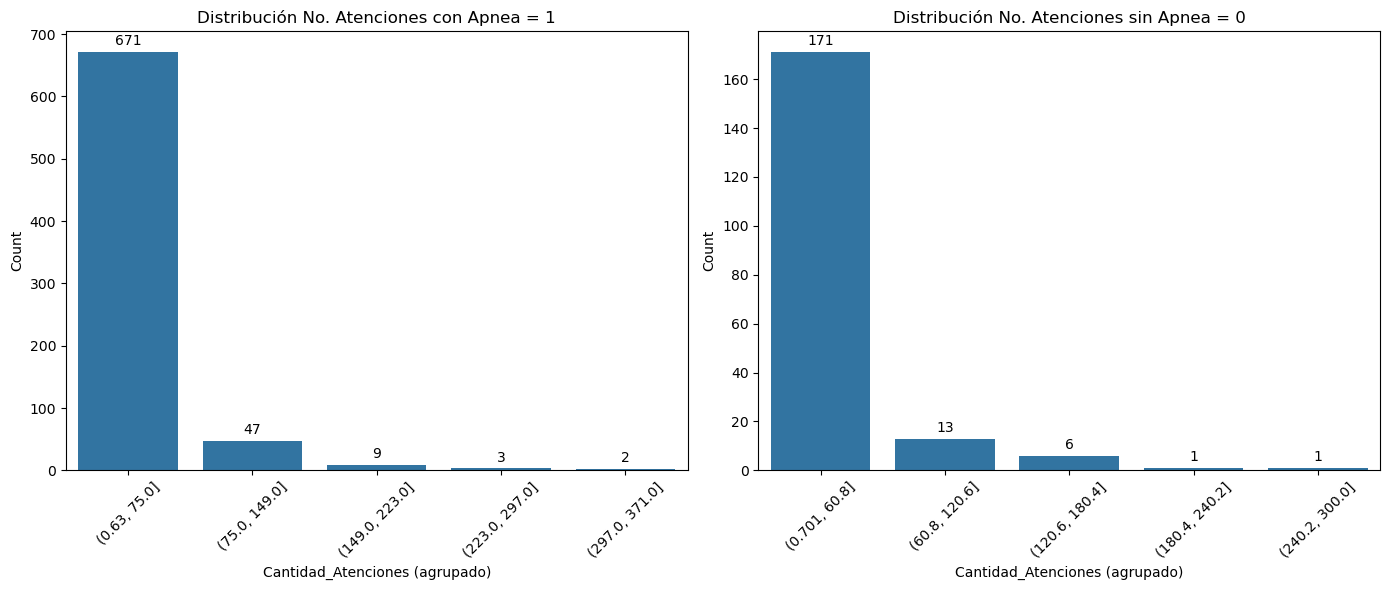

In [18]:
plot_comparative_graphs_with_bins(
    df_3,
    column_to_split="label_apnea",
    column_to_plot="Cantidad_Atenciones",
    bins=5,  # Número de intervalos
    title1="Distribución No. Atenciones con Apnea = 1",
    title2="Distribución No. Atenciones sin Apnea = 0"
)

In [16]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IdCliente                924 non-null    int64  
 1   IAH                      924 non-null    float64
 2   Sexo                     924 non-null    object 
 3   Cantidad_Atenciones      924 non-null    float64
 4   fecha_poli               924 non-null    object 
 5   label_apnea              924 non-null    float64
 6   edad_poli                924 non-null    int64  
 7   last_appointment         924 non-null    object 
 8   prediction_window_start  924 non-null    object 
 9   end_observation_window   924 non-null    object 
 10  num_app_included         924 non-null    int64  
 11  total_app                924 non-null    int64  
 12  lista_consultas          924 non-null    object 
 13  lista_recorte            924 non-null    object 
dtypes: float64(3), int64(4), o

/tmp/ipykernel_11335/2354860469.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['binned'] = pd.cut(df_1[column_to_plot], bins=bins)
/tmp/ipykernel_11335/2354860469.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['binned'] = pd.cut(df_2[column_to_plot], bins=bins)


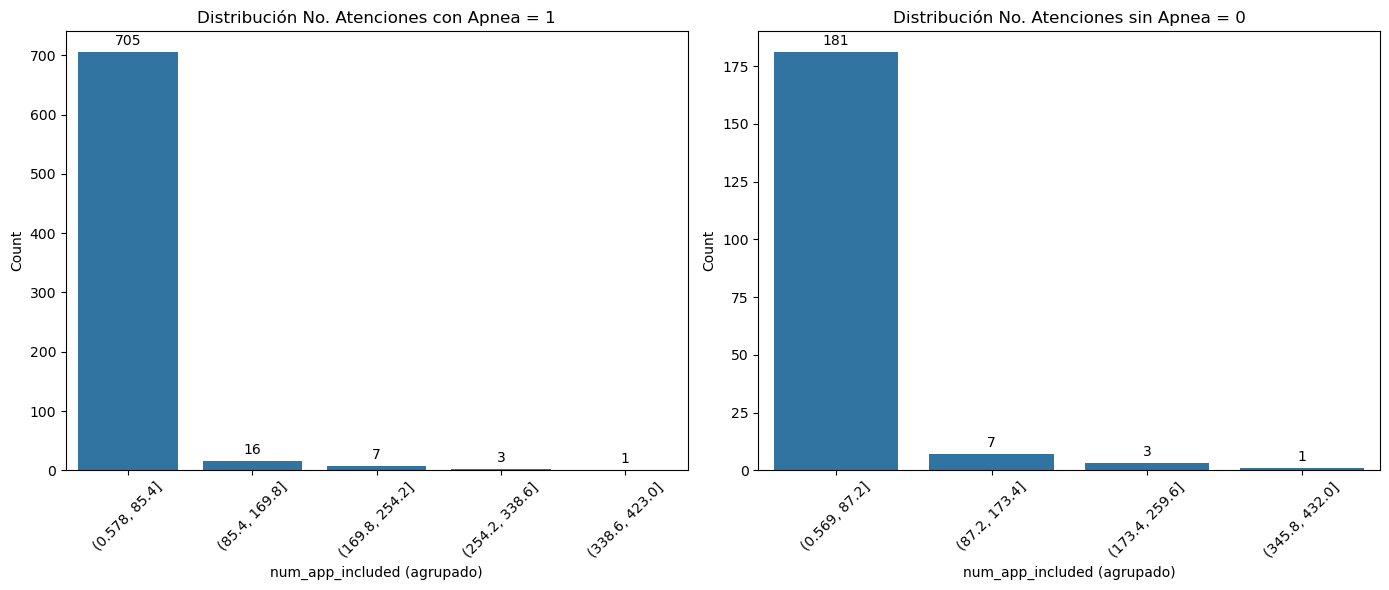

In [17]:
plot_comparative_graphs_with_bins(
    df_3,
    column_to_split="label_apnea",
    column_to_plot="num_app_included",
    bins=5,  # Número de intervalos
    title1="Distribución No. Atenciones con Apnea = 1",
    title2="Distribución No. Atenciones sin Apnea = 0"
)

In [43]:
df_3["label_apnea"]

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
608    1.0
609    1.0
610    1.0
611    1.0
612    1.0
Name: label_apnea, Length: 613, dtype: float64

In [44]:
df_3[["label_apnea","fecha_diagnostico", "last_appointment", "prediction_window_start", "end_observation_window"]]

,label_apnea,fecha_diagnostico,last_appointment,prediction_window_start,end_observation_window
0,1.0,2015-05-26,2017-12-05 08:45:15,2014-11-27,2014-06-12 21:41:54
1,1.0,2018-12-14,2020-01-28 15:51:27,2018-06-17,2018-01-30 11:57:51
2,1.0,2018-07-15,2019-11-29 14:52:45,2018-01-16,2017-11-30 08:26:49
3,1.0,2015-05-25,2016-04-11 11:41:49,2014-11-26,2014-06-05 10:14:06
4,1.0,2014-08-15,2016-10-11 15:51:50,2014-02-16,2014-02-12 15:06:34
...,...,...,...,...,...
608,1.0,2018-10-30,2019-02-05 13:41:43,2018-05-03,2018-05-02 15:14:33
609,1.0,2018-10-29,2018-04-27 07:50:12,2018-05-02,2018-04-27 07:50:12
610,1.0,2018-11-29,2018-12-26 15:41:19,2018-06-02,2018-05-07 11:00:21
611,1.0,2019-04-07,2019-11-04 01:17:56,2018-10-09,2018-05-05 13:57:10


In [ ]:
def graficar_eventos_pacientes_df(df, n_pacientes):
    """
    Grafica eventos temporales para pacientes desde un DataFrame.
    
    Requiere las siguientes columnas:
    - 'fecha_diagnostico'
    - 'last_appointment'
    - 'prediction_window_start'
    - 'end_observation_window'
    - 'evento_futuro' (0 o 1)

    Parámetros:
    - df: pandas DataFrame con las columnas anteriores.
    - n_pacientes: número de pacientes a graficar.
    """

    # Asegurar que las fechas son datetime
    date_cols = ["fecha_diagnostico", "last_appointment", "prediction_window_start", "end_observation_window"]
    for col in date_cols:
        if df[col].dtype == "O" or not pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = pd.to_datetime(df[col])

    # Cortar a los primeros n pacientes
    df_plot = df.iloc[:n_pacientes].copy()
    df_plot = df_plot.reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(13, 1 + n_pacientes))

    for idx, row in df_plot.iterrows():
        y = idx
        paciente_label = f"Paciente {idx + 1}"

        # Línea gris de observación
        ax.plot([row["end_observation_window"], row["last_appointment"]], [y, y],
                color="gray", linewidth=2, label="Trayectoria" if idx == 0 else "")

        # Puntos importantes
        ax.plot(row["fecha_diagnostico"], y, 'o', color="blue", label="Diagnóstico" if idx == 0 else "")
        ax.plot(row["last_appointment"], y, 'o', color="black", label="Último evento" if idx == 0 else "")

        # Ventana de observación
        ax.plot([row["prediction_window_start"], row["end_observation_window"]], [y, y],
                color="red", linewidth=6, label="Ventana de observación" if idx == 0 else "")

        # Evento futuro (dicotómico)
        if "evento_futuro" in df.columns:
            color_dicotomica = "green" if row["evento_futuro"] == 1 else "red"
            ax.plot(row["last_appointment"] + pd.Timedelta(days=30), y, 'o',
                    color=color_dicotomica,
                    label="Evento futuro = 1" if idx == 0 and row["evento_futuro"] == 1 else (
                          "Evento futuro = 0" if idx == 0 and row["evento_futuro"] == 0 else ""))

    # Etiquetas de eje Y
    ax.set_yticks(range(len(df_plot)))
    ax.set_yticklabels([f"Paciente {i+1}" for i in range(len(df_plot))])

    # Eje X
    ax.xaxis_date()
    fig.autofmt_xdate()

    # Estética
    ax.set_title("Línea de tiempo de eventos por paciente")
    ax.set_xlabel("Fecha")
    ax.set_ylabel("Paciente")
    ax.legend(loc="upper right")

    plt.tight_layout()
    plt.show()


/tmp/ipykernel_3294/770587955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_3294/770587955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_datetime(df[col])
/tmp/ipykernel_3294/770587955.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

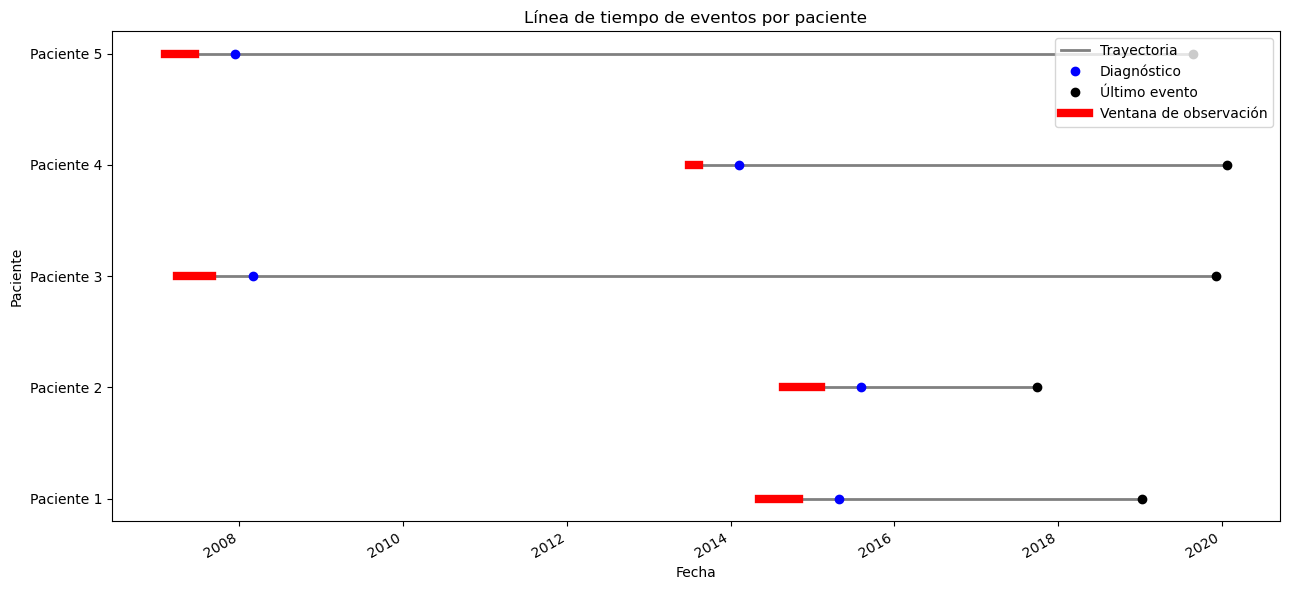

In [19]:
df_g = df_3[["fecha_diagnostico", "last_appointment", "prediction_window_start", "end_observation_window"]]
graficar_eventos_pacientes_df(df_g[50:], n_pacientes=5)

In [20]:
df_3[50:].head(5)

,IdCliente,IAH,Sexo,Cantidad_Atenciones,fecha_diagnostico,label_apnea,edad_poli,last_appointment,prediction_window_start,end_observation_window,num_app_included,total_app,lista_consultas,lista_recorte
50,149781,7.0,F,11.0,2015-04-30,1.0,72,2019-01-10 15:33:07,2014-11-01,2014-05-05 09:50:28,18,54,"[Timestamp('2014-04-29 10:19:15'), Timestamp('...","[Timestamp('2014-05-05 09:50:28'), Timestamp('..."
51,150029,34.0,F,6.0,2015-08-07,1.0,62,2017-09-27 08:53:00,2015-02-08,2014-08-21 10:49:06,1,125,"[Timestamp('2004-12-15 13:47:09'), Timestamp('...",[Timestamp('2014-08-21 10:49:06')]
52,152066,7.4,F,26.0,2008-02-29,1.0,70,2019-12-05 16:54:40,2007-09-02,2007-03-28 09:13:26,5,77,"[Timestamp('2005-03-15 10:27:56'), Timestamp('...","[Timestamp('2007-03-28 09:13:26'), Timestamp('..."
53,155242,19.0,M,29.0,2014-02-08,1.0,48,2020-01-24 01:00:10,2013-08-12,2013-06-27 17:26:25,1,102,"[Timestamp('2006-05-10 14:32:14'), Timestamp('...",[Timestamp('2013-06-27 17:26:25')]
54,155742,11.9,F,206.0,2007-12-14,1.0,48,2019-08-26 15:06:15,2007-06-17,2007-02-02 14:28:49,8,1022,"[Timestamp('2005-03-29 15:23:37'), Timestamp('...","[Timestamp('2007-02-02 14:28:49'), Timestamp('..."
